In [8]:
candidates = pd.read_csv("/home/asier/StructuralAnalysis/ARRAKIHSv3_Infall_Cosmov18.csv")
candidates

,Halo_ID,Snapshot,Redshift,Time,uid,desc_uid,mass,num_prog,virial_radius,scale_radius,vrms,vmax,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,A[x],A[y],A[z],b_to_a,c_to_a,T_U,Tidal_Force,Tidal_ID,Secondary,Sub_tree_id,R/Rvir,Halo_at_z0,has_stars,has_galaxy,delta_rel,stellar_mass,rh_stars_physical,rh_dm_physical,Mdyn,sigma*,e_sigma*
0,251.0,204.0,2.690718,2.489365,1873547.0,1884502.0,3.175214e+10,1.0,103.712250,24.309118,86.449997,72.230003,41936.652344,44873.421875,43054.273438,-76.870003,264.630005,183.059998,-0.53158,3.30598,3.12276,0.81902,0.61418,0.7750,1.37861,1872910.0,False,213.0,1.059703,3306322.0,True,True,0.007719,5.272464e+08,1.600867,12.842605,1.309192e+09,37.295319,1.659405
1,307.0,198.0,2.846597,2.341928,1806601.0,1817761.0,1.344159e+09,1.0,36.183758,3.069801,33.290001,31.250000,41990.898438,44814.984375,43028.054688,-17.090000,235.529999,166.570007,1.53896,0.33824,0.59782,0.80083,0.73790,0.6796,1.36375,1805781.0,False,236.0,1.073105,3306322.0,True,True,0.005550,8.505356e+06,0.841329,3.156545,1.121080e+08,13.929590,1.065919
2,606.0,233.0,2.006524,3.361662,2184505.0,2194410.0,3.900285e+10,3.0,110.267799,18.638176,84.419998,73.430000,41553.203125,45539.804688,43631.824219,-18.200001,72.550003,-60.580002,5.41360,0.86358,-0.30982,0.94741,0.55407,0.7288,1.41918,2184120.0,False,239.0,1.021655,3306322.0,True,True,0.004547,4.599403e+08,2.370215,15.818464,1.770626e+09,34.410853,3.480737
3,210.0,220.0,2.285043,2.953958,2050221.0,2061409.0,2.763533e+09,1.0,45.799145,9.170940,33.689999,31.270000,41598.105469,45108.851562,43449.558594,55.820000,286.179993,12.580000,1.57122,0.61803,-0.28034,0.81708,0.59233,0.6431,1.36857,2048780.0,False,262.0,1.071247,3306322.0,True,True,0.000000,3.295876e+06,0.922989,6.063941,1.351238e+08,19.107156,3.380094
4,507.0,220.0,2.285043,2.953958,2050344.0,2061533.0,7.753561e+09,1.0,64.588318,9.192307,50.430000,46.139999,41829.589844,45352.710938,43511.355469,-226.500000,106.919998,-16.530001,2.58276,-1.02853,0.47128,0.89636,0.68641,0.6720,1.39306,2048780.0,False,277.0,1.046560,3306322.0,True,True,0.006328,3.002829e+07,1.047279,7.812377,2.467652e+08,19.757866,0.893825
5,399.0,217.0,2.342469,2.879901,2018657.0,2029728.0,2.574074e+09,1.0,44.752136,7.388888,34.209999,31.950001,41801.566406,45124.675781,43079.761719,-70.320000,37.740002,268.440002,1.21456,-0.99090,-0.32537,0.91385,0.62961,0.6577,1.41458,2015401.0,False,987.0,1.025290,3306322.0,True,True,0.003327,4.532151e+06,0.583494,5.528547,6.900593e+07,14.879863,0.538599
6,470.0,191.0,2.998880,2.211280,1729128.0,1740770.0,1.011823e+09,1.0,32.944447,7.907408,27.400000,24.410000,41976.628906,44857.253906,43372.667969,-215.449997,79.300003,-15.650000,1.03301,1.08734,-0.11832,0.89282,0.83630,0.7829,1.41265,1725945.0,False,2435.0,1.026828,3306322.0,True,True,0.009914,1.657516e+06,0.514871,3.540186,3.631103e+07,10.656503,0.762857
7,772.0,267.0,1.281803,4.988989,2508737.0,2517238.0,2.952991e+10,4.0,98.613953,11.839031,68.220001,63.060001,41445.640625,46221.472656,44027.125000,-240.309998,184.199997,-53.130001,0.48978,-2.76250,2.93865,0.75242,0.66750,0.6796,1.42124,2506832.0,False,7788.0,1.018628,3306322.0,True,True,0.008145,1.282770e+08,1.816345,16.216466,9.100653e+08,27.778583,2.304598
8,865.0,307.0,0.679261,7.559299,2827295.0,2834879.0,1.040313e+11,4.0,143.964386,14.029915,96.370003,87.190002,40616.242188,47195.027344,44555.886719,-31.900000,95.209999,-24.760000,-1.71222,4.00973,1.19076,0.92889,0.63447,0.6991,1.38821,2826699.0,False,14642.0,1.048830,3306322.0,True,True,0.000324,1.058316e+09,4.667103,32.312003,6.205104e+09,38.977434,3.536364
9,532.0,313.0,0.612409,7.965560,2873027.0,2880369.0,2.804843e+09,1.0,42.833332,4.064103,27.049999,26.100000,40851.964844,47056.203125,44182.609375,-145.399994,216.949997,270.480011,-1.20146,-0.34967,1.73328,0.92000,0.78183,0.6451,1.43812,2872198.0,False,14757.0,1.003558,3306322.0,True,True,0.008476,7.492048e+06,1.965422,8.992384,1.437037e+08,8.295085,1.212333


In [1]:
import yt
import numpy as np
import pandas as pd
from unyt import unyt_array, unyt_quantity

import dextractor as dge
pd.options.display.max_columns = 1000

In [2]:
dge.config.base_units, dge.config.ptypes, dge.config.fields, dge.config.working_units

(None,
 None,
 None,
 {'dimensionless': 'dimensionless',
  'mass': 'Msun',
  'time': 'Gyr',
  'length': 'kpc',
  'velocity': 'km/s',
  'comoving': False})

In [3]:
dge.config.code = "ART"

In [4]:
dge.config.base_units, dge.config.ptypes, dge.config.fields

({'time': '2.1580812909e+20 * s',
  'mass': '4.6208548829e+49 * g',
  'length': '8.5479813130e+01 * Mpc',
  'velocity': '1.2222113417e+06 * cm/s',
  'comoving': False},
 {'stars': 'stars',
  'darkmatter': 'darkmatter',
  'gas': 'art',
  'gas_type': 'MESH'},
 {'stars': {'coords': 'particle_position',
   'vels': 'particle_velocity',
   'masses': 'particle_mass',
   'IDs': 'particle_index',
   'masses_ini': 'particle_mass_initial'},
  'darkmatter': {'coords': 'particle_position',
   'vels': 'particle_velocity',
   'masses': 'particle_mass',
   'IDs': 'particle_index'},
  'gas': {'coords': 'c', 'vels': 'v', 'masses': 'm', 'IDs': 'i'}})

In [5]:
halo = dge.zHalo("./test_data/10MpcBox_csf512_03527.d", 
                 center=([40616.242188/1.66,	47195.027344/1.66,	44555.886719/1.66], "kpc"),
                 radius=(143.964386, "kpc"),
                 dm_params={
                     'rvir': (30, 'kpc'),
                     'rs': unyt_quantity(4, 'kpc'),
                     'vmax': (50,'km/s')
                 },
                 stars_params={
                     'ML': (3, 'Msun/Lsun')
                 }
                )

yt : [INFO     ] 2024-11-22 14:51:53,886 discovered particle_header:/home/asier/StructuralAnalysis/DwarfGalaxyExtractor/test_data/PMcrd_03527.DAT
yt : [INFO     ] 2024-11-22 14:51:53,886 discovered particle_data:/home/asier/StructuralAnalysis/DwarfGalaxyExtractor/test_data/PMcrs0_03527.DAT
yt : [INFO     ] 2024-11-22 14:51:53,886 discovered particle_stars:/home/asier/StructuralAnalysis/DwarfGalaxyExtractor/test_data/stars_03527.dat
yt : [INFO     ] 2024-11-22 14:51:53,890 Using root level of 14
yt : [INFO     ] 2024-11-22 14:51:53,891 Discovered 7 species of particles
yt : [INFO     ] 2024-11-22 14:51:53,891 Particle populations:  13330288   1432362    598765    314898    206550   2064487   1846694 
yt : [INFO     ] 2024-11-22 14:51:53,910 Max level is 13
yt : [INFO     ] 2024-11-22 14:51:53,938 Parameters: current_time              = 7.672384105471882 Gyr
yt : [INFO     ] 2024-11-22 14:51:53,939 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-11-22 14:51:53

{'rvir': (30, 'kpc'), 'rs': unyt_quantity(4, 'kpc'), 'vmax': (50, 'km/s'), 'ML': (3, 'Msun/Lsun')}
{'rvir': (30, 'kpc'), 'rs': unyt_quantity(4, 'kpc'), 'vmax': (50, 'km/s')}


In [9]:
halo.time, halo.stars.coords, halo.darkmatter.masses, halo.stars.ML, halo.darkmatter.rvir, halo.darkmatter.rs, halo.stars._rvir ,halo.stars._rs

(unyt_quantity(7.67238411, 'Gyr'),
 unyt_array([[24400.81570367, 28354.78331221, 26739.06942275],
        [24402.01739624, 28403.72247168, 26750.77751657],
        [24488.75941909, 28433.06456316, 26827.43510656],
        ...,
        [24380.31201521, 28376.01627212, 26744.5580695 ],
        [24388.22850904, 28352.23009771, 26751.02519366],
        [24386.80818792, 28359.70627671, 26749.25170335]], 'kpc'),
 unyt_array([ 281601.26104771,  281601.26104771,  281601.26104771, ...,
        2252810.08838171, 2252810.08838171, 2252810.08838171], 'Msun'),
 unyt_quantity(3., 'Msun/Lsun'),
 unyt_quantity(30., 'kpc'),
 unyt_quantity(4., 'kpc'),
 unyt_quantity(30, 'kpc'),
 unyt_quantity(4, 'kpc'))

In [10]:
halo.set_units({'mass': '10 * Msun',
 'time': '10 * Gyr',
 'length': '10 * kpc',
 'velocity': '1 * km/s',
 'comoving': False})

In [11]:
halo.time, halo.stars.coords, halo.darkmatter.masses, halo.stars.ML, halo.darkmatter.rvir, halo.darkmatter.rs, halo.stars._rvir ,halo.stars._rs

(unyt_quantity(0.76723841, '10*Gyr'),
 unyt_array([[2440.08157037, 2835.47833122, 2673.90694227],
        [2440.20173962, 2840.37224717, 2675.07775166],
        [2448.87594191, 2843.30645632, 2682.74351066],
        ...,
        [2438.03120152, 2837.60162721, 2674.45580695],
        [2438.8228509 , 2835.22300977, 2675.10251937],
        [2438.68081879, 2835.97062767, 2674.92517033]], '10*kpc'),
 unyt_array([ 28160.12610477,  28160.12610477,  28160.12610477, ...,
        225281.00883817, 225281.00883817, 225281.00883817], '10*Msun'),
 unyt_quantity(3., 'Msun/Lsun'),
 unyt_quantity(3., '10*kpc'),
 unyt_quantity(0.4, '10*kpc'),
 unyt_quantity(30, 'kpc'),
 unyt_quantity(4, 'kpc'))

In [9]:
halo.darkmatter.rvir

In [10]:
halo.time = 1

AttributeError: property 'time' of 'zHalo' object has no setter

In [9]:
halo.stars.units

{'mass': '10 * Msun',
 'time': '10 * Gyr',
 'length': '10 * kpc',
 'velocity': '1 * km/s',
 'comoving': False}

In [32]:
halo.darkmatter.rvir

In [23]:
halo.stars.refined_center_of_mass(method="hm", mfrac=0.5)

unyt_array([24394.16411385, 28361.28580969, 26744.057293  ], 'kpc')

In [26]:
halo.stars.half_mass_radius()

unyt_quantity(11.82124887, 'kpc')

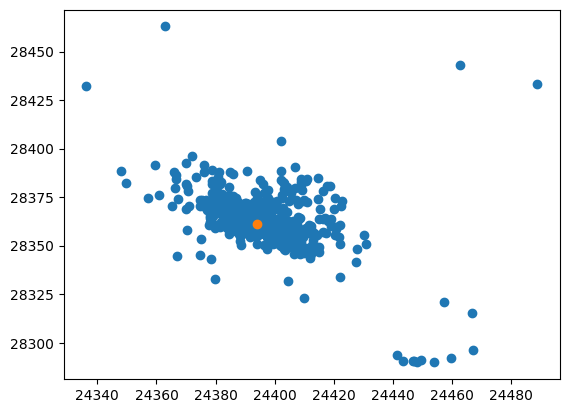

In [25]:
import matplotlib.pyplot as plt
plt.scatter(halo.stars.coords[:,0], halo.stars.coords[:,1])
plt.scatter(halo.stars.cm[0], halo.stars.cm[1])
plt.scatter(halo.stars.cm[0], halo.stars.cm[1])
plt.scatter(halo.stars.cm[0], halo.stars.cm[1])
plt.scatter(halo.stars.cm[0], halo.stars.cm[1])

In [7]:
halo.info()


general information
---------------------
snapshot path       : ./test_data
snapshot file       : 10MpcBox_csf512_03527.d
redshift            : 0.6661
scale_factor        : 0.6002
age                 : 7.6724 Gyr
cut-out center      : [24467.62, 28430.74, 26840.90]  kpc
cut-out radius      : 143.96 kpc
dm                  : 6.299e+10 Msun
stars               : 9.873e+06 Msun
gas                 : yes
Mdyn                : None

units
---------------------
length_unit         : kpc
velocity_unit       : km/s
mass_unit           : Msun
time_unit           : Gyr
comoving            : False

coordinate basis
---------------------
type                : orthonormal
line-of-sight       : [1, 0, 0]
u1                  : [1.00, 0.00, 0.00]
u2                  : [0.00, 1.00, 0.00]
u3                  : [0.00, 0.00, 1.00]

stars
---------------------
len_pos             : 574
pos[0]              : [24400.82, 28354.78, 26739.07] kpc
pos[-1]             : [24386.81, 28359.71, 26749.25] kpc
len_vel

In [8]:
halo.stars.IDs

unyt_array([17947469., 17947576., 17947579., ..., 19793908., 19793914.,
       19793923.], '(dimensionless)')

In [9]:
halo.set_units({'mass': '10 * Msun',
 'time': '10 * Gyr',
 'length': '1 * kpc',
 'velocity': '1 * km/s',
 'comoving': False})

In [10]:
halo.stars.masses

unyt_array([12058.91320236, 19584.57455319, 22440.64137713, ...,
        2334.39866842,  2723.70657137,  2149.98472872], '10*Msun')

In [13]:
unyt_quantity(1, 's') < 1

array(False)

In [22]:
x = 100, 'kpc'
y = unyt_quantity(*x)

In [12]:
unyt_quantity(None, 'kpc')

RuntimeError: unyt_quantity values must be numeric